In [41]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import *
data = np.load("data/innos.npy", allow_pickle=True) # (y - y_hat)
np.array(data).shape

(515,)

In [2]:
inno = []
for p in data:
    inno.append(p[:3])
inno = np.array(inno).reshape(-1,3)
inno.shape

(515, 3)

In [3]:
# https://scicoding.com/4-ways-of-calculating-autocorrelation-in-python/
def plot_autocorr(data,N=100):
    # Mean
    mean = np.mean(data)

    # Variance
    var = np.var(data)

    # Normalized data
    ndata = data - mean

    acorr = np.correlate(ndata, ndata, 'full')[len(ndata)-1:] 
    acorr = acorr / var / len(ndata)
    plt.plot(acorr[:N])

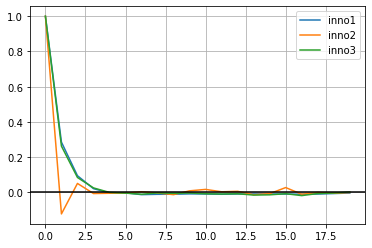

In [4]:
plot_autocorr(inno[:,0], N=20)
plot_autocorr(inno[:,1], N=20)
plot_autocorr(inno[:,2], N=20)
plt.grid()
plt.axhline(0, color='black')
plt.legend(['inno1','inno2','inno3'])
# https://www.robots.ox.ac.uk/~ian/Teaching/ TODO: read this one : ) 

In [55]:
path = np.load("data/path.npy", allow_pickle=True).reshape(-1,6)[:,:3]
path_time = np.load("data/path_time.npy", allow_pickle=True).reshape(-1,1)#.repeat(3,axis=1)
gt_path = np.load("data/gt_path.npy", allow_pickle=True)
gt_time = np.load("data/gt_time.npy", allow_pickle=True)

path.shape, path_time.shape, gt_path.shape, gt_time.shape

((876, 3), (876, 1), (5719, 3), (5719,))

In [74]:
fx_path = interp1d(path_time.flatten(), path[:,0].flatten(), kind='linear')
fy_path = interp1d(path_time.flatten(), path[:,1].flatten(), kind='linear')
fz_path = interp1d(path_time.flatten(), path[:,2].flatten(), kind='linear')

fx_gt = interp1d(gt_time.flatten(), gt_path[:,0].flatten(), kind='linear')
fy_gt = interp1d(gt_time.flatten(), gt_path[:,1].flatten(), kind='linear')
fz_gt = interp1d(gt_time.flatten(), gt_path[:,2].flatten(), kind='linear')

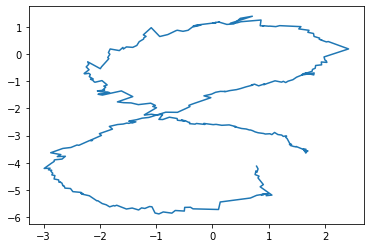

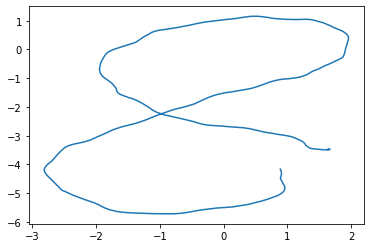

In [75]:
interp_time = np.linspace(path_time[0], path_time[-1], 1000)
plt.plot(fx_path(interp_time),fy_path(interp_time))
plt.figure(2)
plt.plot(fx_gt(interp_time),fy_gt(interp_time))

In [93]:
int_path = np.array([
    fx_path(interp_time), fy_path(interp_time), fz_path(interp_time)
])
int_gt = np.array([
    fx_gt(interp_time), fy_gt(interp_time), fz_gt(interp_time)
])

rmse = np.sqrt(((int_path - int_gt)**2).mean(axis=1))
mse = ((int_path - int_gt)**2).mean(axis=1)

np.linalg.norm(rmse,2), np.linalg.norm(mse), mse

(0.3592314686217289,
 0.08582276017798238,
 array([[0.03505184],
        [0.01767752],
        [0.07631789]]))